## Personalization Case Study

### Importing necessary libraries

In [622]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## The Inventory file

In [207]:
inventory=pd.read_csv('D://Personalization//inventory snapshot.csv')

In [208]:
inventory.head()

,Unnamed: 0,Month,Year,Retailler_Id,Product_ID,QTY,Week
0,1,4,2018,10693,00JH06,1,2018-04-06 23:59:00.000
1,2,4,2018,10693,00JH05,1,2018-04-06 23:59:00.000
2,3,4,2018,10693,00DM08,1,2018-04-06 23:59:00.000
3,4,4,2018,10693,00PF19,8,2018-04-06 23:59:00.000
4,5,4,2018,10725,00PD08,2,2018-04-06 23:59:00.000


In [209]:
inventory.drop('Unnamed: 0',axis=1,inplace=True)

In [210]:
inventory.shape

(228149, 6)

#### Grouping the values on unique 'Retailler_Id' , 'Product_ID' and 'Week' values

In [211]:
final_inventory=inventory.groupby(by=['Retailler_Id','Product_ID','Week'],as_index=False).QTY.sum()

In [212]:
final_inventory.head()

,Retailler_Id,Product_ID,Week,QTY
0,10000,00DH19,2018-04-06 23:59:00.000,122
1,10000,00DH19,2018-04-13 23:59:00.000,112
2,10000,00DH19,2018-04-20 23:59:00.000,107
3,10000,00DH19,2018-04-27 23:59:00.000,109
4,10000,00DH19,2018-05-04 23:59:00.000,103


## The Retail File

In [361]:
retail=pd.read_csv('D://Personalization//retail_data.csv')

In [344]:
retail.head()

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
0,AVSI100002015000008,2015-04-06,10000,Urban,00DK04,88121.06,Returned,Cash,1
1,AVSI100002015000009,2015-04-08,10000,Urban,00DK04,88121.06,Returned,Cash,1
2,AVSI100002015000010,2015-04-09,10000,Urban,00DH15,72026.80,Returned,Cash,1
3,AVSI100002015000011,2015-04-10,10000,Urban,00DH15,72026.80,Returned,Cash,1
4,AVSI100002015000012,2015-04-13,10000,Urban,00DU10,35727.06,Returned,Cash,1


In [345]:
retail.Retal_Value.describe()

count    7.374830e+05
mean     5.551630e+04
std      2.041693e+04
min      7.610000e+01
25%      3.914800e+04
50%      4.683520e+04
75%      7.334224e+04
max      3.047011e+06
Name: Retal_Value, dtype: float64

In [346]:
retail_cate=retail[['Location_Type','Return_Flag','Mode_Payment']]

### Let's see how are the levels distributed of categorical data in our retail data

In [347]:
for c in retail_cate.columns:
    print("---- %s ---" % c)
    print(retail_cate[c].value_counts())
    print()

---- Location_Type ---
Urban    524783
Rural    212700
Name: Location_Type, dtype: int64

---- Return_Flag ---
Returned    737483
Name: Return_Flag, dtype: int64

---- Mode_Payment ---
Cash       530921
Finance    197612
Name: Mode_Payment, dtype: int64



### We clearly see above that Return_Flag only has one level and isn't going to be of any use in our case, so we are going to drop it.

In [348]:
retail=retail.drop({'Return_Flag'},axis=1)

### Now another thing is the amount of data available.

### We see that retail table has info about only 50 retailers, while inventory data contains info about more than these many retailers, let's see it below:

In [70]:
retail.Retailer_ID.unique()

array([10000, 10033, 10051, 10103, 10120, 10137, 10148, 10163, 10164,
       10185, 10192, 10194, 10208, 10210, 10214, 10223, 10224, 10237,
       12191, 10275, 10285, 10288, 10296, 10335, 10344, 10361, 10363,
       10370, 10373, 10401, 10420, 10427, 10448, 10456, 10466, 10501,
       10509, 10579, 10584, 10650, 10655, 10659, 10675, 10690, 10693,
       10726, 10729, 10734, 10769, 10771], dtype=int64)

In [77]:
final_inventory.Retailler_Id.unique()

array([10000, 10017, 10033, 10042, 10047, 10051, 10057, 10076, 10089,
       10103, 10115, 10118, 10120, 10124, 10137, 10148, 10163, 10164,
       10168, 10173, 10185, 10192, 10194, 10196, 10200, 10208, 10210,
       10214, 10219, 10223, 10224, 10237, 10268, 10272, 10275, 10277,
       10285, 10286, 10287, 10288, 10296, 10309, 10311, 10326, 10335,
       10344, 10349, 10361, 10363, 10370, 10373, 10375, 10382, 10396,
       10398, 10401, 10403, 10411, 10420, 10427, 10432, 10447, 10448,
       10456, 10466, 10480, 10490, 10501, 10509, 10529, 10579, 10584,
       10614, 10650, 10655, 10659, 10670, 10674, 10675, 10690, 10693,
       10725, 10726, 10729, 10734, 10745, 10769, 10771, 10790, 10811,
       10812, 10816, 10829, 10902, 10925, 10928, 10936, 10947, 10956,
       10963, 10971, 10993, 10997, 11009, 11031, 11042, 11096, 11132,
       11177, 11207, 11208, 11214, 11215, 11263, 11268, 11272, 11296,
       11333, 11341, 11364, 11415, 11417, 11419, 11427, 11435, 11444,
       11453, 11457,

### So we are going to work only for the retailers whose info is available

In [78]:
print(set(final_inventory.Retailler_Id)-set(retail.Retailer_ID))

{11268, 11272, 12811, 12302, 12303, 12817, 12313, 12826, 12827, 10268, 12828, 11806, 12829, 10272, 11296, 11809, 12832, 10277, 10790, 10286, 10287, 11824, 12846, 12847, 12854, 10811, 10812, 10816, 12864, 10309, 11333, 10311, 12869, 10829, 11341, 11856, 10326, 11862, 11867, 12384, 11364, 10349, 10375, 11912, 10382, 10902, 11415, 11417, 11419, 10396, 10398, 10403, 11427, 11941, 11942, 10411, 11435, 10925, 10928, 11444, 11959, 10936, 11453, 11966, 12477, 10432, 11457, 10947, 11459, 11972, 11463, 11464, 10956, 11468, 10447, 10963, 11478, 11482, 10971, 11483, 12506, 11487, 11493, 12525, 10480, 10993, 11507, 10997, 10490, 12540, 11009, 11541, 11031, 12571, 12061, 10017, 10529, 11042, 12066, 12579, 11562, 12591, 12081, 12083, 12086, 10042, 10047, 12102, 10057, 11601, 12625, 12628, 11096, 11608, 10076, 11616, 12643, 12644, 10089, 12656, 10614, 11638, 12663, 12667, 11132, 10115, 11651, 12675, 10118, 11655, 10124, 11177, 11691, 12715, 10670, 10674, 12723, 12724, 10168, 12726, 12732, 10173, 12734

### So let's just keep info about the IDs available in retail table in inventory as well

In [81]:
new_inventory=final_inventory.loc[final_inventory['Retailler_Id'].isin(retail.Retailer_ID)]

In [82]:
len(new_inventory.Retailler_Id.unique())

50

### And we see that now our inventory data has info about the Retailer_ID available in Retail Data

In [85]:
new_inventory.shape

(13297, 4)

## Now the Retailorder File

In [185]:
retailerorder=pd.read_csv('D://Personalization//Retailler order data.csv', low_memory=False)

In [186]:
retailerorder['Product_ID']=retailerorder['SKU'].str[:-2]

In [187]:
retailerorder.shape

(259922, 17)

In [86]:
retailerorder.head()

,ï..Bill.Doc.,Sales.Doc.,Type,Requested.delivery.datee,Sold.to.pt,Fund.Clearance.date,SKU,Billing.Date,Order.Quantity,Billed.Quantity,Trip.Number,Target_Shipment_Date,Actual_Shipment_Date,Distance_Per_Day,Retailler_Distance,Rejection.code,Product_ID
0,340111007.0,1125563,Planned,04-04-2015,10033,04-04-2015,00JD025J,04-04-2015,3,3,469539.0,NaN,NaN,NaN,NaN,NaN,00JD02
1,340111007.0,1125563,Planned,04-04-2015,10033,04-04-2015,00JD025L,04-04-2015,2,2,469539.0,NaN,NaN,NaN,NaN,NaN,00JD02
2,340111005.0,1125570,Planned,03-04-2015,10051,03-04-2015,00JD025J,03-04-2015,3,3,469455.0,NaN,NaN,NaN,NaN,NaN,00JD02
3,340111005.0,1125570,Planned,03-04-2015,10051,03-04-2015,00JD025L,03-04-2015,2,2,469455.0,NaN,NaN,NaN,NaN,NaN,00JD02
4,340111098.0,1125610,Planned,16-04-2015,10163,16-04-2015,00JD025L,20-04-2015,5,5,471533.0,NaN,NaN,NaN,NaN,NaN,00JD02


### Let's see how are the levels distributed of categorical data in our retailorder data

In [90]:
print("---- %s ---" % retailerorder[['Type']].columns[0])
print(retailerorder.Type.value_counts())

---- Type ---
Planned       201181
Additional     58741
Name: Type, dtype: int64


### So there are clearly distinct levels, we are going to use these later for segmentation

### Now let's observe missing values in retailerorder data, since there are quite a lot of them missing

In [104]:
new_retailorder.isnull().sum()*100/new_retailorder.shape[0]

ï..Bill.Doc.                56.123760
Sales.Doc.                   0.000000
Type                         0.000000
Requested.delivery.datee     0.000000
Sold.to.pt                   0.000000
Fund.Clearance.date          0.000000
SKU                          0.000000
Billing.Date                56.123760
Order.Quantity               0.000000
Billed.Quantity              0.000000
Trip.Number                 56.185702
Target_Shipment_Date        76.309047
Actual_Shipment_Date        76.309047
Distance_Per_Day            76.309047
Retailler_Distance          76.309047
Rejection.code              45.631382
Product_ID                   0.000000
dtype: float64

### It's clearly visible that quite a lot of these values are missing.

## Let's create a new dataframe with Retailer_Ids as index and with attributes to cluster them

### The first two attribute I am using are their percentage selling location, because I think we can get a good idea about similar types of dealers depending on where they sell these products(Urban or Rural)

### We can get the Type of location where the product was sold like below:

In [218]:
retail.groupby(by=['Retailer_ID','Location_Type']).Location_Type.count()

Retailer_ID  Location_Type
10000        Rural               20
             Urban            12312
10033        Rural               44
             Urban            13143
10051        Urban            17806
10103        Urban            10663
10120        Rural             3028
             Urban            12128
10137        Rural               84
             Urban             4349
10148        Urban             9424
10163        Rural            12708
10164        Rural             1641
             Urban             6782
10185        Rural             7219
             Urban             8521
10192        Urban            16055
10194        Rural             7076
             Urban             7647
10208        Urban            14304
10210        Rural             1244
             Urban            21240
10214        Rural            12510
10223        Rural              951
             Urban            11363
10224        Urban            12678
10237        Rural            14506
1

### Now it's pretty clear that some Retailers sell exclusively in Rural regions, some exclusively in Urban area and some are mix of it. So let's get the percentage count of their Location selling type(we will use the ration only)

In [227]:
to_meltdata=retail.groupby(by=['Retailer_ID','Location_Type'],as_index=False).Transaction_Id.count()

In [237]:
location_info = to_meltdata.pivot(index='Retailer_ID', columns='Location_Type', values='Transaction_Id')

In [259]:
location_info.head()

Location_Type,Rural,Urban
Retailer_ID,,
10000,20.0,12312.0
10033,44.0,13143.0
10051,NaN,17806.0
10103,NaN,10663.0
10120,3028.0,12128.0


In [271]:
tocluster=pd.DataFrame(np.array(location_info)/np.array(location_info.sum(axis=1)).reshape(-1,1),columns=location_info.columns,index=location_info.index)
tocluster=tocluster.fillna(0)
tocluster.columns.name=''

In [279]:
tocluster.head(10)

,Rural,Urban
Retailer_ID,,
10000,0.001622,0.998378
10033,0.003337,0.996663
10051,0.000000,1.000000
10103,0.000000,1.000000
10120,0.199789,0.800211
10137,0.018949,0.981051
10148,0.000000,1.000000
10163,1.000000,0.000000
10164,0.194824,0.805176


### What we see above is Location Type of sales ratio of each retailer

### Now let's add the proportional count of how many high price, mid priced and low priced values did they sell. The intuition is that this will help us to differentiate the type of retailers, that do they deal in luxury items or low priced or mixed. 

### But before we do that, we need to impute some outliers. There are few outliers, let's see them

In [349]:
retail.columns

Index(['Transaction_Id', 'Transaction_Date', 'Retailer_ID', 'Location_Type',
       'Product_ID', 'Retal_Value', 'Mode_Payment', 'Retail_Qty'],
      dtype='object')

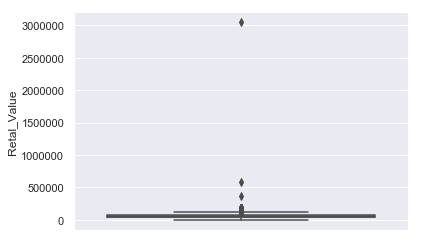

In [362]:
sns.boxplot(y='Retal_Value',hue='Location_Type',data=retail)

### We clearly see that a few values are way beyong the normal, seems like clear outlier. Let's dig deep

In [352]:
retail.Retal_Value.sort_values(ascending=False).head()

231912    3047010.65
456337     592110.00
513962     368960.00
513132     179870.50
510638     179855.30
Name: Retal_Value, dtype: float64

### We see that not only there is a value of 30 lakh as max where second highest is 5 lakh, but also in the min section, three values as way lesser than usual.

### Seems like outliers. Let's see which product's Retail Value is coming like this and is it unusual

In [353]:
retail.sort_values(by=["Retal_Value"],ascending=False).head()

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Mode_Payment,Retail_Qty
231912,VSI11436201500949,2016-02-22,10285,Urban,00DU11,3047010.65,Cash,1
456337,VSI101852017000088,2017-04-08,10185,Rural,00JH05,592110.00,Cash,1
513962,VSI101852017000758,2017-06-16,10185,Rural,00DU13,368960.00,Finance,1
513132,VSI103632017000630,2017-06-21,10363,Urban,00JF04,179870.50,Finance,1
510638,VSI106902017000293,2017-06-21,10690,Urban,00JF04,179855.30,Cash,1


### Let's check what the usual or avg price of this product '00DU11' is:

In [355]:
retail[retail.Product_ID=='00DU11'].sort_values(by=["Retal_Value"],ascending=False).head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Mode_Payment,Retail_Qty
231912,VSI11436201500949,2016-02-22,10285,Urban,00DU11,3047010.65,Cash,1
463323,VSI101852016001638,2017-02-10,10185,Rural,00DU11,75262.90,Finance,1
454515,VSIBRN012016000190,2017-01-17,10690,Rural,00DU11,49730.35,Finance,1
453297,VSI114082016000778,2017-01-27,10690,Rural,00DU11,49730.35,Finance,1
453187,VSI114082016000768,2017-01-22,10690,Rural,00DU11,49730.35,Finance,1
467539,VSI106902016001218,2017-01-08,10690,Urban,00DU11,49437.35,Finance,1
472612,VSI106902016001391,2017-02-24,10690,Urban,00DU11,49038.45,Finance,1
467099,VSI106902016001232,2017-01-12,10690,Urban,00DU11,49030.35,Cash,1
453354,VSI114082016000741,2017-01-15,10690,Rural,00DU11,49030.35,Cash,1
453300,VSI114082016000783,2017-01-29,10690,Rural,00DU11,49030.35,Cash,1


In [356]:
print('Minimum value is:    ',retail[retail.Product_ID=='00DU11'].Retal_Value.min())
print('Mean value is:       ',retail[retail.Product_ID=='00DU11'].Retal_Value.mean())
print('Maximum value is:    ', retail[retail.Product_ID=='00DU11'].Retal_Value.max())

Minimum value is:     29838.7
Mean value is:        38919.639969846
Maximum value is:     3047010.65


### It's clearly visible from the two table above, that this product's mean value is 38919. It's possible that when it was new, it's sale price was quite high, which we can clearly see is around the second highest 75262.90, but it's in no way possible can be 30 lakhs. So we are going to impute this value by the mean value

In [363]:
retail.loc[231912, 'Retal_Value']=38919.639969846

In [364]:
retail.iloc[231912].Retal_Value

38919.639969846

### We see the imputation has worked. Now let's see the plot again

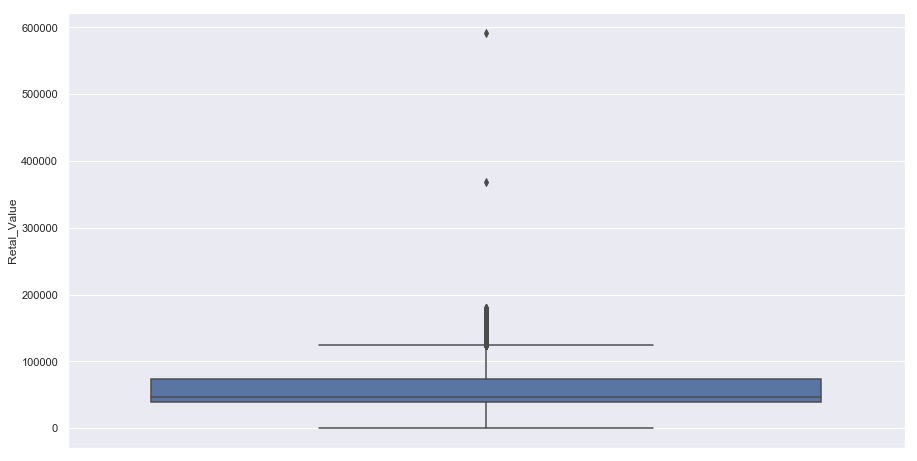

In [366]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Retal_Value',data=retail)

### There are still clearly some outliers as per the boxplot, let's see are they unusual or not

In [372]:
retail.sort_values(by=["Retal_Value"],ascending=False).head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
456337,VSI101852017000088,2017-04-08,10185,Rural,00JH05,592110.0,Returned,Cash,1
513962,VSI101852017000758,2017-06-16,10185,Rural,00DU13,368960.0,Returned,Finance,1
513132,VSI103632017000630,2017-06-21,10363,Urban,00JF04,179870.5,Returned,Finance,1
510638,VSI106902017000293,2017-06-21,10690,Urban,00JF04,179855.3,Returned,Cash,1
517079,VSI106902017000264,2017-06-09,10690,Urban,00JF04,179455.3,Returned,Cash,1
452174,VSI106902017000104,2017-04-26,10690,Urban,00JF04,179430.4,Returned,Finance,1
509395,VSI103632017000609,2017-06-19,10363,Urban,00JF04,179340.5,Returned,Finance,1
531051,VSI101372017000122,2017-06-03,10137,Urban,00JF04,177719.6,Returned,Cash,1
529084,VSI101372017000132,2017-06-09,10137,Urban,00JF04,177719.6,Returned,Cash,1
510102,VSI101372017000128,2017-06-08,10137,Urban,00JF04,177719.6,Returned,Finance,1


### Now for the same product, is this a possible value or unusual, let's see

In [368]:
retail[retail.Product_ID=='00JH05'].sort_values(by=["Retal_Value"],ascending=False).head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
456337,VSI101852017000088,2017-04-08,10185,Rural,00JH05,592110.00,Returned,Cash,1
535081,VSI103632017000545,2017-06-09,10363,Urban,00JH05,70875.25,Returned,Finance,1
510788,VSI106902017000256,2017-06-07,10690,Urban,00JH05,70668.65,Returned,Finance,1
451216,VSI106902017000105,2017-04-26,10690,Urban,00JH05,70668.65,Returned,Finance,1
452385,VSI106902017000078,2017-04-19,10690,Urban,00JH05,70668.65,Returned,Finance,1
523975,VSI106902017000181,2017-05-16,10690,Urban,00JH05,70668.65,Returned,Finance,1
521645,VSI106902017000271,2017-06-12,10690,Urban,00JH05,70668.65,Returned,Finance,1
523553,VSI106902017000158,2017-05-09,10690,Urban,00JH05,70668.65,Returned,Finance,1
509713,VSI106902017000154,2017-05-09,10690,Urban,00JH05,70668.65,Returned,Finance,1
451399,VSI106902017000025,2017-04-07,10690,Urban,00JH05,70339.20,Returned,Finance,1


### Now this is same situation as before, so let's impute the Retal_Value for this product by it's mean

In [373]:
print('Minimum value is:    ',retail[retail.Product_ID=='00JH05'].Retal_Value.min())
print('Mean value is:       ',retail[retail.Product_ID=='00JH05'].Retal_Value.mean())
print('Maximum value is:    ', retail[retail.Product_ID=='00JH05'].Retal_Value.max())

Minimum value is:     21748.01
Mean value is:        57681.875413078895
Maximum value is:     592110.0


In [374]:
retail.loc[456337, 'Retal_Value']=57681.875413078895

### And similarly making changes to other outlier as well

In [375]:
print('Minimum value is:    ',retail[retail.Product_ID=='00DU13'].Retal_Value.min())
print('Mean value is:       ',retail[retail.Product_ID=='00DU13'].Retal_Value.mean())
print('Maximum value is:    ', retail[retail.Product_ID=='00DU13'].Retal_Value.max())

Minimum value is:     22168.01
Mean value is:        34639.86722087221
Maximum value is:     368960.0


In [376]:
retail.loc[513962, 'Retal_Value']=34639.86722087221

### How about the third max value, is that an outlier? Let's see

In [380]:
print('Minimum value is:    ',retail[retail.Product_ID=='00JF04'].Retal_Value.min())
print('Mean value is:       ',retail[retail.Product_ID=='00JF04'].Retal_Value.mean())
print('Maximum value is:    ', retail[retail.Product_ID=='00JF04'].Retal_Value.max())

Minimum value is:     141017.2
Mean value is:        158010.44999999882
Maximum value is:     179870.5


### It's clearly visible that this max price isn't unusual and since this is a Bike Data from Bajaj, this price is admissible

### Now, let's see about the prices in the other end

In [381]:
retail.sort_values(by=["Retal_Value"]).head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
483258,AVSI102242017000069,2017-05-23,10224,Urban,00DH19,76.10,Returned,Cash,1
480951,AVSI102242017000069,2017-05-23,10224,Urban,00DH19,76.10,Returned,Cash,1
501851,AVSI102242017000087,2017-06-02,10224,Urban,00DH19,4105.27,Returned,Cash,1
470439,VSI104662016001326,2017-01-04,10466,Urban,00PF09,10000.43,Returned,Cash,1
470438,VSI104662016001324,2017-01-04,10466,Urban,00DU10,10023.33,Returned,Cash,1
464633,VSI104662016001323,2017-01-04,10466,Urban,00DH15,10094.32,Returned,Cash,1
464634,VSI104662016001325,2017-01-04,10466,Urban,00DU10,10595.83,Returned,Cash,1
571517,AVSI104561701868,2017-10-17,10456,Urban,00DU16,14831.36,Returned,Cash,1
659185,AVSI106901700529,2018-02-08,10690,Urban,00JH05,21748.01,Returned,Finance,1
659184,AVSI106901700529,2018-02-08,10690,Urban,00JH05,21749.01,Returned,Finance,1


### Clearly price of 76 and 4105 seems unusual for a two-wheeler vehicle. Let's perform the same analysis for these Products

In [382]:
print('Minimum value is:    ',retail[retail.Product_ID=='00DH19'].Retal_Value.min())
print('Mean value is:       ',retail[retail.Product_ID=='00DH19'].Retal_Value.mean())
print('Maximum value is:    ', retail[retail.Product_ID=='00DH19'].Retal_Value.max())

Minimum value is:     76.1
Mean value is:        75640.37814770597
Maximum value is:     155097.1


In [387]:
retail[retail.Product_ID=='00DH19'].Retal_Value.sort_values().head(10)

480951       76.10
483258       76.10
501851     4105.27
656424    40784.00
656423    40784.00
656422    40784.00
659183    40784.00
711978    42097.01
658450    55606.01
504337    59025.92
Name: Retal_Value, dtype: float64

### That's a massive difference. It's understandable that at the time of announcement of the product the price was that high and it reduced with time, but it can have been sold at the price of anywhere below 5000.

### So we will impute these values with the mean

In [388]:
retail.loc[483258, 'Retal_Value']=75640.37814770597
retail.loc[480951, 'Retal_Value']=75640.37814770597
retail.loc[501851, 'Retal_Value']=75640.37814770597

In [389]:
retail.sort_values(by=["Retal_Value"]).head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
470439,VSI104662016001326,2017-01-04,10466,Urban,00PF09,10000.43,Returned,Cash,1
470438,VSI104662016001324,2017-01-04,10466,Urban,00DU10,10023.33,Returned,Cash,1
464633,VSI104662016001323,2017-01-04,10466,Urban,00DH15,10094.32,Returned,Cash,1
464634,VSI104662016001325,2017-01-04,10466,Urban,00DU10,10595.83,Returned,Cash,1
571517,AVSI104561701868,2017-10-17,10456,Urban,00DU16,14831.36,Returned,Cash,1
659185,AVSI106901700529,2018-02-08,10690,Urban,00JH05,21748.01,Returned,Finance,1
659184,AVSI106901700529,2018-02-08,10690,Urban,00JH05,21749.01,Returned,Finance,1
708704,AVSI106901800116,2018-05-28,10690,Urban,00DU16,21799.01,Returned,Finance,1
712816,AVSI106901800116,2018-05-28,10690,Urban,00DU16,21801.02,Returned,Finance,1
708609,AVSI106901800107,2018-05-23,10690,Urban,00DU13,22168.01,Returned,Finance,1


### Now all these other prices though might be outlier as per their usual prices but for now it's acceptable, because we are going to put them under bins as per their Retal_Val, so this much is alright

### So moving on, as now we are done with the Retal_Val clean-up, we shall now divide these values into 3 sections and mark the sold item as High, Medium and Low Priced

In [401]:
retail['Price_Level']=pd.qcut(retail.Retal_Value,3,labels=['Low','Med','High'])

In [404]:
retail.head(10)

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty,Price_Level
0,AVSI100002015000008,2015-04-06,10000,Urban,00DK04,88121.06,Returned,Cash,1,High
1,AVSI100002015000009,2015-04-08,10000,Urban,00DK04,88121.06,Returned,Cash,1,High
2,AVSI100002015000010,2015-04-09,10000,Urban,00DH15,72026.80,Returned,Cash,1,High
3,AVSI100002015000011,2015-04-10,10000,Urban,00DH15,72026.80,Returned,Cash,1,High
4,AVSI100002015000012,2015-04-13,10000,Urban,00DU10,35727.06,Returned,Cash,1,Low
5,AVSI100002015000013,2015-04-13,10000,Urban,00JZ16,62366.80,Returned,Cash,1,Med
6,AVSI100002015000015,2015-04-16,10000,Urban,00DZ10,41876.10,Returned,Cash,1,Low
7,AVSI100002015000016,2015-04-18,10000,Urban,00PA16,52306.60,Returned,Cash,1,Med
8,AVSI100002015000017,2015-04-21,10000,Urban,00DK04,88121.06,Returned,Cash,1,High
9,AVSI100002015000018,2015-04-21,10000,Urban,00PD01,82904.66,Returned,Cash,1,High


### Let's get the info about how many of these price_level products did each Retailer sold

In [408]:
to_meltdata2=retail.groupby(by=['Retailer_ID','Price_Level'],as_index=False).Transaction_Id.count()
price_info = to_meltdata2.pivot(index='Retailer_ID', columns='Price_Level', values='Transaction_Id')
temp=pd.DataFrame(np.array(price_info)/np.array(price_info.sum(axis=1)).reshape(-1,1),columns=price_info.columns,index=price_info.index)
temp=temp.fillna(0)
temp.columns.name=''

In [410]:
temp

,Low,Med,High
Retailer_ID,,,
10000,0.127473,0.211077,0.661450
10033,0.560249,0.341624,0.098127
10051,0.492081,0.428058,0.079861
10103,0.623464,0.285379,0.091156
10120,0.487992,0.440486,0.071523
10137,0.066772,0.151590,0.781638
10148,0.466469,0.383595,0.149936
10163,0.404312,0.348363,0.247325
10164,0.219755,0.188175,0.592069


### So above we see, out of total vehicles they sold, how many by proportion were Low, Med and High priced

### We are going to add this to our tocluster data to use as an attribute for clustering

In [413]:
finalcluster=pd.concat([tocluster,temp],axis=1)

In [414]:
finalcluster

,Rural,Urban,Low,Med,High
Retailer_ID,,,,,
10000,0.001622,0.998378,0.127473,0.211077,0.661450
10033,0.003337,0.996663,0.560249,0.341624,0.098127
10051,0.000000,1.000000,0.492081,0.428058,0.079861
10103,0.000000,1.000000,0.623464,0.285379,0.091156
10120,0.199789,0.800211,0.487992,0.440486,0.071523
10137,0.018949,0.981051,0.066772,0.151590,0.781638
10148,0.000000,1.000000,0.466469,0.383595,0.149936
10163,1.000000,0.000000,0.404312,0.348363,0.247325
10164,0.194824,0.805176,0.219755,0.188175,0.592069


### One more attribute that can help us differentiate b/w Retailers and find the similarity b/w them, is Retailer_Distance. This distance is the distance of the Retailer from the manufacturing unit they have ordered from. 

### Now how is it useful? For each Retailer, there are multiple Retailer_Distance values, since the order could've been delivered by different different warehouse. Now a Retailer's sales, inventory is highly dependent on how far is it from the Warehouse. So what we can do is, get the mean Retailer_Distance of each Retailer and use it as an attribute. 

### Let's do this:

In [444]:
new_retailorder[new_retailorder.Retailler_Distance.notna()][['Sold.to.pt','Retailler_Distance']].drop_duplicates().sort_values('Sold.to.pt')

,Sold.to.pt,Retailler_Distance
194371,10000,1216.0
1899,10000,628.0
879,10000,644.0
1044,10033,1464.0
14640,10033,1330.0
196047,10033,180.0
193973,10051,246.0
18750,10051,1215.0
928,10051,1446.0
736,10103,1788.0


### We clearly see that a particular Retailer is using multiple Retailer_Distances. So let's group these by Retailer_ID and use mean value

In [447]:
distance_val=new_retailorder[new_retailorder.Retailler_Distance.notna()][['Sold.to.pt','Retailler_Distance']].drop_duplicates().groupby(['Sold.to.pt']).mean()

### Now let's add these distance values to our cluster table

In [450]:
finalcluster2=pd.concat([finalcluster,distance_val],axis=1)

In [452]:
finalcluster2.head()

,Rural,Urban,Low,Med,High,Retailler_Distance
10000,0.001622,0.998378,0.127473,0.211077,0.661450,829.333333
10033,0.003337,0.996663,0.560249,0.341624,0.098127,991.333333
10051,0.000000,1.000000,0.492081,0.428058,0.079861,969.000000
10103,0.000000,1.000000,0.623464,0.285379,0.091156,1359.000000
10120,0.199789,0.800211,0.487992,0.440486,0.071523,1060.666667


### Now we can perform clustering and get the similar Dealers into their clusters.

### But before we do that, the thing we should always perform before clustering is, that here scale of Retailer_Distances is way higher and different than 0-1 scale of  Retailer_Distance. So we do need to rescale these.

### I'll perform (x-min)/(max-min) and reduce these values to the scale of 0-1.

In [454]:
finalcluster2['Retailer_Distance_Rescaled']=(finalcluster2.Retailler_Distance-finalcluster2.Retailler_Distance.min())/(finalcluster2.Retailler_Distance.max()-finalcluster2.Retailler_Distance.min())

In [463]:
finalcluster3=finalcluster2.drop(columns=['Retailler_Distance'],axis=1)

### So our final clustering table is below:

In [464]:
finalcluster3

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled
10000,0.001622,0.998378,0.127473,0.211077,0.661450,0.196195
10033,0.003337,0.996663,0.560249,0.341624,0.098127,0.334185
10051,0.000000,1.000000,0.492081,0.428058,0.079861,0.315162
10103,0.000000,1.000000,0.623464,0.285379,0.091156,0.647359
10120,0.199789,0.800211,0.487992,0.440486,0.071523,0.393242
10137,0.018949,0.981051,0.066772,0.151590,0.781638,0.801107
10148,0.000000,1.000000,0.466469,0.383595,0.149936,0.317149
10163,1.000000,0.000000,0.404312,0.348363,0.247325,0.292731
10164,0.194824,0.805176,0.219755,0.188175,0.592069,0.724020
10185,0.458640,0.541360,0.545362,0.262325,0.192313,0.130324


### Let's perform K-means clustering on this data

In [470]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Now before we fit KMeans clustering, we need to know how many clusters to fit

### For that the technique we are going to use is called the elbow method.

### By means of Elbow Curve we try to plot the percentage of variance explained by the number of clusters we are forming which with each increase of a cluster, decreases as eventually every point becomes it's own cluster.

### The improvements will decline, at some point rapidly, creating the elbow shape.

In [484]:
distortions1 = []
K = range(1,50)
for k in K:
    kmeanModel1 = KMeans(n_clusters=k).fit(finalcluster3)
    distortions1.append(sum(np.min(cdist(finalcluster3, kmeanModel1.cluster_centers_, 'euclidean'), axis=1)) / finalcluster3.shape[0])

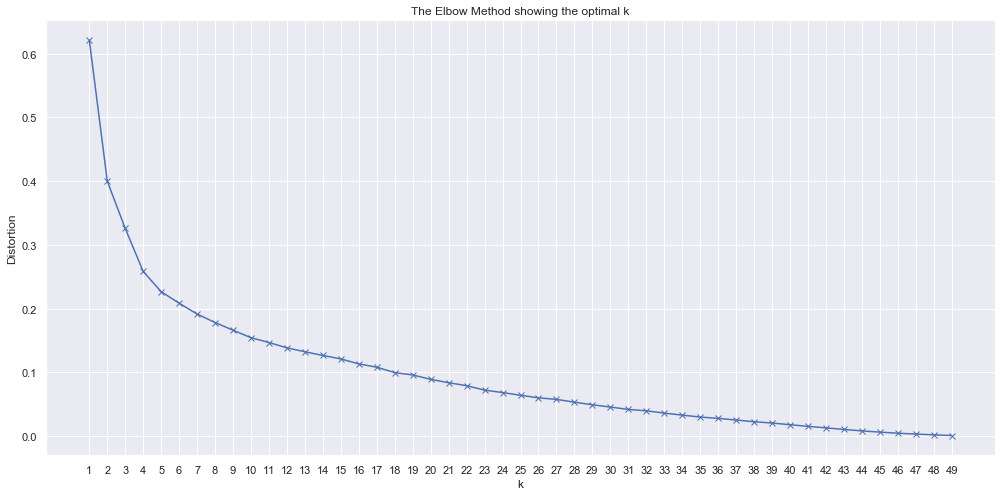

In [485]:
# Plot the elbow
plt.figure(figsize=(17,8))
plt.plot(K, distortions1, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(ticks=list(K))
plt.show()

### Now this above showed that total 4 clusters would give us give result.

### Let's see what kind of clusters have we formed

In [490]:
kmeanModelType1 = KMeans(n_clusters=4).fit(finalcluster3)

In [492]:
kmeanModelType1.labels_

array([2, 1, 1, 1, 1, 2, 1, 0, 2, 3, 1, 3, 1, 2, 0, 2, 2, 0, 2, 1, 1, 3,
       2, 3, 2, 1, 2, 3, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 3, 3,
       0, 1, 2, 0, 1, 0])

### So above are our labels given the distance measure included and fitting 4 clusters. Let's see how these values are in comparision to eachother.

In [495]:
labelledfinalcluster3=finalcluster3.copy()

labelledfinalcluster3['Labels']=kmeanModelType1.labels_

In [496]:
labelledfinalcluster3

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled,Labels
10000,0.001622,0.998378,0.127473,0.211077,0.661450,0.196195,2
10033,0.003337,0.996663,0.560249,0.341624,0.098127,0.334185,1
10051,0.000000,1.000000,0.492081,0.428058,0.079861,0.315162,1
10103,0.000000,1.000000,0.623464,0.285379,0.091156,0.647359,1
10120,0.199789,0.800211,0.487992,0.440486,0.071523,0.393242,1
10137,0.018949,0.981051,0.066772,0.151590,0.781638,0.801107,2
10148,0.000000,1.000000,0.466469,0.383595,0.149936,0.317149,1
10163,1.000000,0.000000,0.404312,0.348363,0.247325,0.292731,0
10164,0.194824,0.805176,0.219755,0.188175,0.592069,0.724020,2
10185,0.458640,0.541360,0.545362,0.262325,0.192313,0.130324,3


In [501]:
labelledfinalcluster3[labelledfinalcluster3.Labels==0].describe(include='all')

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled,Labels
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.999714,0.000286,0.331284,0.359923,0.308793,0.506827,0.0
std,0.000949,0.000949,0.155072,0.069577,0.169186,0.273894,0.0
min,0.996852,0.000000,0.121913,0.194236,0.073294,0.212379,0.0
25%,1.000000,0.000000,0.180876,0.349276,0.208220,0.270301,0.0
50%,1.000000,0.000000,0.370182,0.375561,0.279630,0.415957,0.0
75%,1.000000,0.000000,0.430139,0.382457,0.414901,0.718626,0.0
max,1.000000,0.003148,0.551145,0.485897,0.636278,0.925468,0.0


In [502]:
labelledfinalcluster3[labelledfinalcluster3.Labels==1].describe(include='all')

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled,Labels
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.025585,0.974415,0.475936,0.356278,0.167785,0.357811,1.0
std,0.050531,0.050531,0.112983,0.054398,0.104386,0.155256,0.0
min,0.000000,0.800211,0.301153,0.285379,0.038815,0.125639,1.0
25%,0.000000,0.968112,0.377854,0.316553,0.085509,0.301675,1.0
50%,0.000000,1.000000,0.487992,0.336219,0.143177,0.317149,1.0
75%,0.031888,1.000000,0.570173,0.396486,0.274113,0.440801,1.0
max,0.199789,1.000000,0.647658,0.464674,0.352353,0.647359,1.0


In [503]:
labelledfinalcluster3[labelledfinalcluster3.Labels==2].describe(include='all')

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled,Labels
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,0.053617,0.946383,0.127474,0.246775,0.625751,0.585552,2.0
std,0.065856,0.065856,0.061839,0.112751,0.155694,0.273782,0.0
min,0.000000,0.805176,0.041410,0.090385,0.354112,0.000000,2.0
25%,0.000084,0.917162,0.083040,0.179029,0.546571,0.517036,2.0
50%,0.031509,0.968491,0.134152,0.226807,0.629628,0.621060,2.0
75%,0.082838,0.999916,0.167435,0.294319,0.729656,0.743292,2.0
max,0.194824,1.000000,0.219755,0.472650,0.832058,1.000000,2.0


In [504]:
labelledfinalcluster3[labelledfinalcluster3.Labels==3].describe(include='all')

,Rural,Urban,Low,Med,High,Retailer_Distance_Rescaled,Labels
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,0.443318,0.556682,0.397429,0.311526,0.291045,0.352303,3.0
std,0.051678,0.051678,0.108864,0.041705,0.109420,0.177173,0.0
min,0.364131,0.486398,0.234633,0.262325,0.192313,0.130324,3.0
25%,0.422323,0.521934,0.314329,0.278763,0.202712,0.255892,3.0
50%,0.448939,0.551061,0.425532,0.304862,0.255365,0.306573,3.0
75%,0.478066,0.577677,0.457696,0.336678,0.345980,0.407794,3.0
max,0.513602,0.635869,0.545362,0.384483,0.490080,0.649063,3.0


### If we see above and try to see the difference between each clusters; it's pretty clear that some of these have distict difference from each other and can be profiled on the basis of those.

### These are the mean values in each attribute of each Cluster

```
Cluster 1: Retailers who usually sell in Rural Areas and sell equal number of Low,Mid and High priced products
           Rural        Urban        Low         Med         High        Retailer_Distance_Rescaled
           0.999714     0.000286     0.331284    0.359923    0.308793    0.506827


Cluster 2: Retailers who usually sell in Urban Areas and usually deal in Low and Mid priced products
           Rural        Urban        Low         Med         High        Retailer_Distance_Rescaled
           0.025585     0.974415     0.475936    0.356278    0.167785    0.357811


Cluster 3: Retailers who usually sell in Urban Areas and usually deal in High priced products
           Rural        Urban        Low         Med         High        Retailer_Distance_Rescaled
           0.053617     0.946383     0.127474    0.246775    0.625751    0.585552


Cluster 4: Retailers who sell the products in almost equal amount in both location types and with price range of sold 
           items  is in equal number of Low, Mid and High        
           Rural        Urban        Low         Med         High        Retailer_Distance_Rescaled
           0.443318     0.556682     0.397429    0.311526    0.291045    0.352303

```

### Now in each case, Retailer_Distance seems sort of not that helpful in identification of these clusters, so now... what if we remove distance from the data we are forming clusters on(as it was avg of distances) and see if it giving a better result?

### The finalcluster table doesn't have Retail_Distance column in it, so let's perform the same analysis on that data

In [487]:
distortions2 = []
K = range(1,50)
for k in K:
    kmeanModel2 = KMeans(n_clusters=k).fit(finalcluster)
    distortions2.append(sum(np.min(cdist(finalcluster, kmeanModel2.cluster_centers_, 'euclidean'), axis=1)) / finalcluster.shape[0])

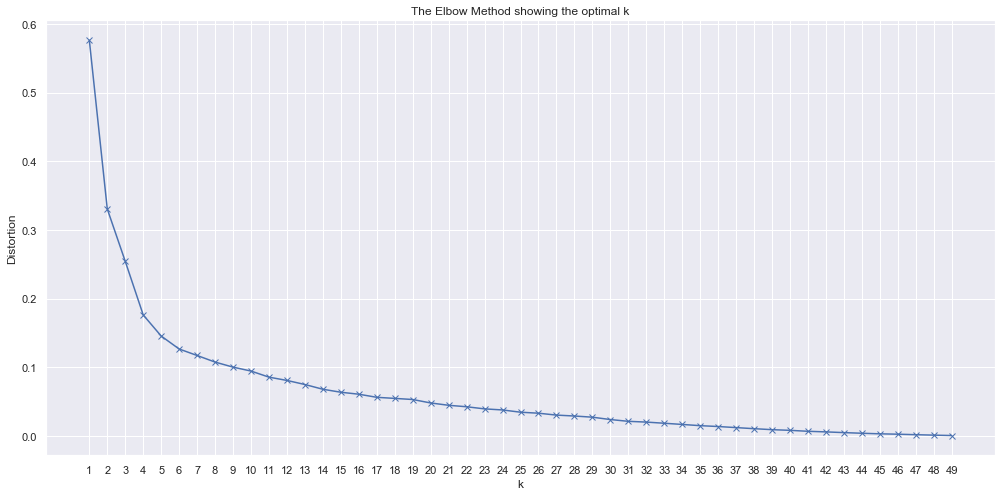

In [488]:
# Plot the elbow
plt.figure(figsize=(17,8))
plt.plot(K, distortions2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(ticks=list(K))
plt.show()

### We see that the drop in the percentage of variance explained by the number of clusters is more significant. Let's see how's the output for 4 clusters in this case and let's see the possible profiling in this case

In [511]:
kmeanModelType2 = KMeans(n_clusters=4, random_state=100).fit(finalcluster)

In [512]:
labelledfinalcluster=finalcluster.copy()

labelledfinalcluster['Labels']=kmeanModelType2.labels_

In [513]:
labelledfinalcluster[labelledfinalcluster.Labels==0].describe(include='all')

,Rural,Urban,Low,Med,High,Labels
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.025585,0.974415,0.475936,0.356278,0.167785,0.0
std,0.050531,0.050531,0.112983,0.054398,0.104386,0.0
min,0.000000,0.800211,0.301153,0.285379,0.038815,0.0
25%,0.000000,0.968112,0.377854,0.316553,0.085509,0.0
50%,0.000000,1.000000,0.487992,0.336219,0.143177,0.0
75%,0.031888,1.000000,0.570173,0.396486,0.274113,0.0
max,0.199789,1.000000,0.647658,0.464674,0.352353,0.0


In [514]:
labelledfinalcluster[labelledfinalcluster.Labels==1].describe(include='all')

,Rural,Urban,Low,Med,High,Labels
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.999714,0.000286,0.331284,0.359923,0.308793,1.0
std,0.000949,0.000949,0.155072,0.069577,0.169186,0.0
min,0.996852,0.000000,0.121913,0.194236,0.073294,1.0
25%,1.000000,0.000000,0.180876,0.349276,0.208220,1.0
50%,1.000000,0.000000,0.370182,0.375561,0.279630,1.0
75%,1.000000,0.000000,0.430139,0.382457,0.414901,1.0
max,1.000000,0.003148,0.551145,0.485897,0.636278,1.0


In [515]:
labelledfinalcluster[labelledfinalcluster.Labels==2].describe(include='all')

,Rural,Urban,Low,Med,High,Labels
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,0.053617,0.946383,0.127474,0.246775,0.625751,2.0
std,0.065856,0.065856,0.061839,0.112751,0.155694,0.0
min,0.000000,0.805176,0.041410,0.090385,0.354112,2.0
25%,0.000084,0.917162,0.083040,0.179029,0.546571,2.0
50%,0.031509,0.968491,0.134152,0.226807,0.629628,2.0
75%,0.082838,0.999916,0.167435,0.294319,0.729656,2.0
max,0.194824,1.000000,0.219755,0.472650,0.832058,2.0


In [516]:
labelledfinalcluster[labelledfinalcluster.Labels==3].describe(include='all')

,Rural,Urban,Low,Med,High,Labels
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,0.443318,0.556682,0.397429,0.311526,0.291045,3.0
std,0.051678,0.051678,0.108864,0.041705,0.109420,0.0
min,0.364131,0.486398,0.234633,0.262325,0.192313,3.0
25%,0.422323,0.521934,0.314329,0.278763,0.202712,3.0
50%,0.448939,0.551061,0.425532,0.304862,0.255365,3.0
75%,0.478066,0.577677,0.457696,0.336678,0.345980,3.0
max,0.513602,0.635869,0.545362,0.384483,0.490080,3.0


## These are our results of each clusters with their Profiles:

```
Cluster 1: Retailers who usually sell in Urban Areas and usually deal in Low and Mid priced products
           Rural       Urban        Low         Med         High
           0.025585    0.974415     0.475936    0.356278    0.167785
     
     
Cluster 2: Retailers who usually sell in Rural Areas and sell equal number of Low,Mid and High priced products
           Rural       Urban        Low         Med         High
           0.999714    0.000286     0.331284    0.359923    0.308793


Cluster 3: Retailers who usually sell in Urban Areas and usually deal in High priced products
           Rural       Urban        Low         Med         High
           0.053617    0.946383     0.127474    0.246775    0.625751


Cluster 4: Retailers who sell the products in almost equal amount in both location types and with price range of sold 
           items is in equal number of Low,Mid and High          
           Rural       Urban        Low         Med         High
           0.443318    0.556682     0.397429    0.311526    0.291045

```

### One improvement in this model is that the resultant distinction has improved more than earlier and there's a clear demarcation of profiles now.

## And this answers the first question of the case study:

### Q1. Using the given data (you can use derived variables) find the dealer clusters and recommend the optimal number of dealer clusters. How does different dealer clusters differ from each other. Explain?

### Now let's move on to Q2.

### Q2. From each cluster find a dealer which represents the cluster well.

#### Cluster 1: Retailers who usually sell in Urban Areas and usually deal in Low and Mid priced products

In [555]:
labelledfinalcluster[labelledfinalcluster.Labels==0]

,Rural,Urban,Low,Med,High,Labels
Retailer_ID,,,,,,
10033,0.003337,0.996663,0.560249,0.341624,0.098127,0
10051,0.000000,1.000000,0.492081,0.428058,0.079861,0
10103,0.000000,1.000000,0.623464,0.285379,0.091156,0
10120,0.199789,0.800211,0.487992,0.440486,0.071523,0
10148,0.000000,1.000000,0.466469,0.383595,0.149936,0
10192,0.000000,1.000000,0.330614,0.330863,0.338524,0
10208,0.000000,1.000000,0.590954,0.332075,0.076971,0
10285,0.000000,1.000000,0.337697,0.309950,0.352353,0
10288,0.000000,1.000000,0.534764,0.328168,0.137068,0


#### Clearly Retailer with ID- 10771 is the best representative of the cluster No.1 (labelled as 0) given the profile of the cluster as set above

### Moving on to others

#### Cluster 2: Retailers who usually sell in Rural Areas and sell equal number of Low,Mid and High priced products

In [518]:
labelledfinalcluster[labelledfinalcluster.Labels==1]

,Rural,Urban,Low,Med,High,Labels
Retailer_ID,,,,,,
10163,1.000000,0.000000,0.404312,0.348363,0.247325,1
10214,1.000000,0.000000,0.413989,0.308873,0.277138,1
10237,1.000000,0.000000,0.192265,0.370123,0.437612,1
10420,1.000000,0.000000,0.130534,0.384449,0.485017,1
10448,1.000000,0.000000,0.370182,0.350188,0.279630,1
10501,1.000000,0.000000,0.446288,0.384596,0.169116,1
10579,1.000000,0.000000,0.551145,0.375561,0.073294,1
10655,1.000000,0.000000,0.169486,0.194236,0.636278,1
10726,0.996852,0.003148,0.324223,0.376407,0.299370,1


#### Cluster 3: Retailers who usually sell in Urban Areas and usually deal in High priced products

In [538]:
labelledfinalcluster[labelledfinalcluster.Labels==2]

,Rural,Urban,Low,Med,High,Labels
Retailer_ID,,,,,,
10000,0.001622,0.998378,0.127473,0.211077,0.661450,2
10137,0.018949,0.981051,0.066772,0.151590,0.781638,2
10164,0.194824,0.805176,0.219755,0.188175,0.592069,2
10210,0.055328,0.944672,0.088463,0.199208,0.712329,2
10223,0.077229,0.922771,0.089816,0.090385,0.819799,2
10224,0.000000,1.000000,0.041410,0.259662,0.698927,2
10275,0.000000,1.000000,0.159656,0.242538,0.597806,2
10335,0.151612,0.848388,0.042473,0.125469,0.832058,2
10361,0.000112,0.999888,0.214296,0.347807,0.437898,2


#### Cluster 4: Retailers who sell the products in almost equal amount in both location types and with price range of sold items is in equal number of Low, Mid and High          


In [520]:
labelledfinalcluster[labelledfinalcluster.Labels==3]

,Rural,Urban,Low,Med,High,Labels
Retailer_ID,,,,,,
10185,0.458640,0.541360,0.545362,0.262325,0.192313,3
10194,0.480609,0.519391,0.327175,0.347348,0.325477,3
10296,0.438093,0.561907,0.442690,0.279922,0.277388,3
10344,0.375014,0.624986,0.433538,0.333121,0.233341,3
10373,0.513602,0.486398,0.417526,0.384483,0.197992,3
10401,0.364131,0.635869,0.234633,0.275287,0.490080,3
10690,0.439237,0.560763,0.275790,0.316724,0.407487,3
10693,0.477218,0.522782,0.502716,0.292999,0.204285,3


### So the final output is:

### Cluster 1-  ID-10771
### Cluster 2-  ID-10726
### Cluster 3-  ID-10335
### Cluster 4-  ID-10194

### These are the Cluster representatives of each clusters

## Now let's go into Q3 and Q4.

### Q3. Choose from all the methods which are covered in content.
	(try maximum approaches from :naive, mean, seasonal naive, moving average, exponential smoothing).
	Which method is performing better based on test data (split data into train and test) metrics.? 
	Choose metrics which seems fit and explain why you choose it.

### Q4. Based on best model forecast retail sales for july and august 2018 standing in begining of june 2018 for SKU:DH19 & DU16.  

### The issue here is that, do we even have substantial amount of retail data for each of these two products for the above selected Retailers

In [570]:
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10771)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10726)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10335)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10194)].shape)

(1323, 10)
(914, 10)
(162, 10)
(769, 10)


In [571]:
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10771)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10726)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10335)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10194)].shape)

(63, 10)
(1310, 10)
(2134, 10)
(1070, 10)


### We clearly see that for these Retailer_IDs, in some cases we don't have enough data to do forecasting. Which clearly could be the because the Product above belongs to a low price category, while the Retailer belong to the cluster who sell High Priced products.

### This was bound to happen, given the criteria on which we have formed clusters.

### So due to this, we check if any other Retailer can be chosen which represents a cluster quite well and we have substantial data available for it as well. So let's see:

In [567]:
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10456)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10726)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10734)].shape)
print(retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10194)].shape)

(1287, 10)
(914, 10)
(659, 10)
(769, 10)


In [564]:
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10456)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10726)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10734)].shape)
print(retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10194)].shape)

(1099, 10)
(1310, 10)
(1657, 10)
(1070, 10)


### So we finally have these IDs that represent their Clusters well, as well as have substantial amount of retail data as well:

### Cluster 1-  ID-10456
### Cluster 2-  ID-10726
### Cluster 3-  ID-10734
### Cluster 4-  ID-10194

### So we are selecting these as our Cluster representatives

### Now the next thing that we need to do is, get the aggregated montly sales of each of these SKU's for each of these Retailers and then train and test a best forecasting model.

In [572]:
retail.columns

Index(['Transaction_Id', 'Transaction_Date', 'Retailer_ID', 'Location_Type',
       'Product_ID', 'Retal_Value', 'Return_Flag', 'Mode_Payment',
       'Retail_Qty', 'Price_Level'],
      dtype='object')

### Let's first convert Transaction_Date into datetime format 

In [575]:
retail.Transaction_Date=pd.to_datetime(retail.Transaction_Date, format='%Y-%m-%d')

### Let's get the aggregated data for each of these SKU's for each of these Cluster Representatives

### The naming convention will be: c(cluster_number)_(sku number)

In [640]:
c1_00DU16=retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10456)]
c2_00DU16=retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10726)]
c3_00DU16=retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10734)]
c4_00DU16=retail[(retail.Product_ID=='00DU16') & (retail.Retailer_ID==10194)]

c1_00DH19=retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10456)]
c2_00DH19=retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10726)]
c3_00DH19=retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10734)]
c4_00DH19=retail[(retail.Product_ID=='00DH19') & (retail.Retailer_ID==10194)]

### Now, we need to aggregate each of these, on Month-Year basis

In [624]:
c1_00DU16['MonthYear']=c1_00DU16.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))

In [631]:
c1_00DU16.head()

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty,Price_Level,MonthYear
474271,AVSI104561700535,2017-08-13,10456,Urban,00DU16,38747.33,Returned,Cash,1,Low,2017-08
474399,AVSI104561700557,2017-08-14,10456,Urban,00DU16,38747.33,Returned,Cash,1,Low,2017-08
475660,AVSI104561700616,2017-08-21,10456,Urban,00DU16,39500.80,Returned,Cash,1,Low,2017-08
475788,AVSI104561700687,2017-08-27,10456,Urban,00DU16,38751.18,Returned,Cash,1,Low,2017-08
476616,AVSI104561700644,2017-08-22,10456,Urban,00DU16,38751.18,Returned,Cash,1,Low,2017-08


In [632]:
c1_00DU16final=c1_00DU16.groupby(by='MonthYear').sum().Retail_Qty
c1_00DU16final.index=pd.to_datetime(c1_00DU16final.index,format='%Y-%m')

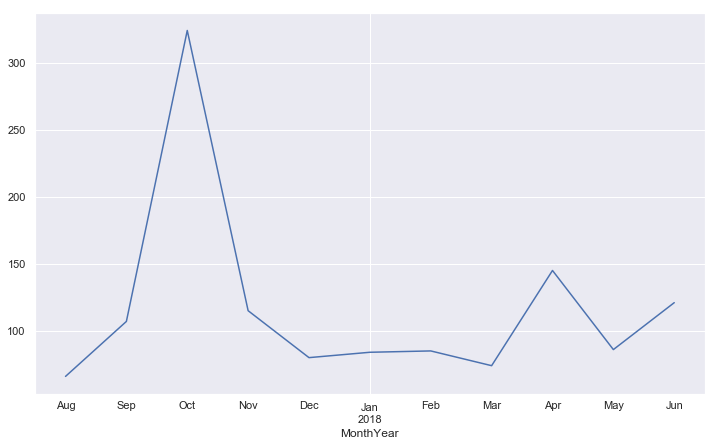

In [633]:
c1_00DU16final.plot(figsize=(12,7))

### Similarly perform same operation on all the other datasets

In [634]:
c2_00DU16['MonthYear']=c2_00DU16.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c2_00DU16final=c2_00DU16.groupby(by='MonthYear').sum().Retail_Qty
c2_00DU16final.index=pd.to_datetime(c2_00DU16final.index,format='%Y-%m')

In [641]:
c3_00DU16['MonthYear']=c3_00DU16.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c3_00DU16final=c3_00DU16.groupby(by='MonthYear').sum().Retail_Qty
c3_00DU16final.index=pd.to_datetime(c3_00DU16final.index,format='%Y-%m')

In [667]:
c4_00DU16['MonthYear']=c4_00DU16.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c4_00DU16final=c4_00DU16.groupby(by='MonthYear').sum().Retail_Qty
c4_00DU16final.index=pd.to_datetime(c4_00DU16final.index,format='%Y-%m')

### We see below, the time series retail sales of the selected Retailers for the Product SKU- DU16

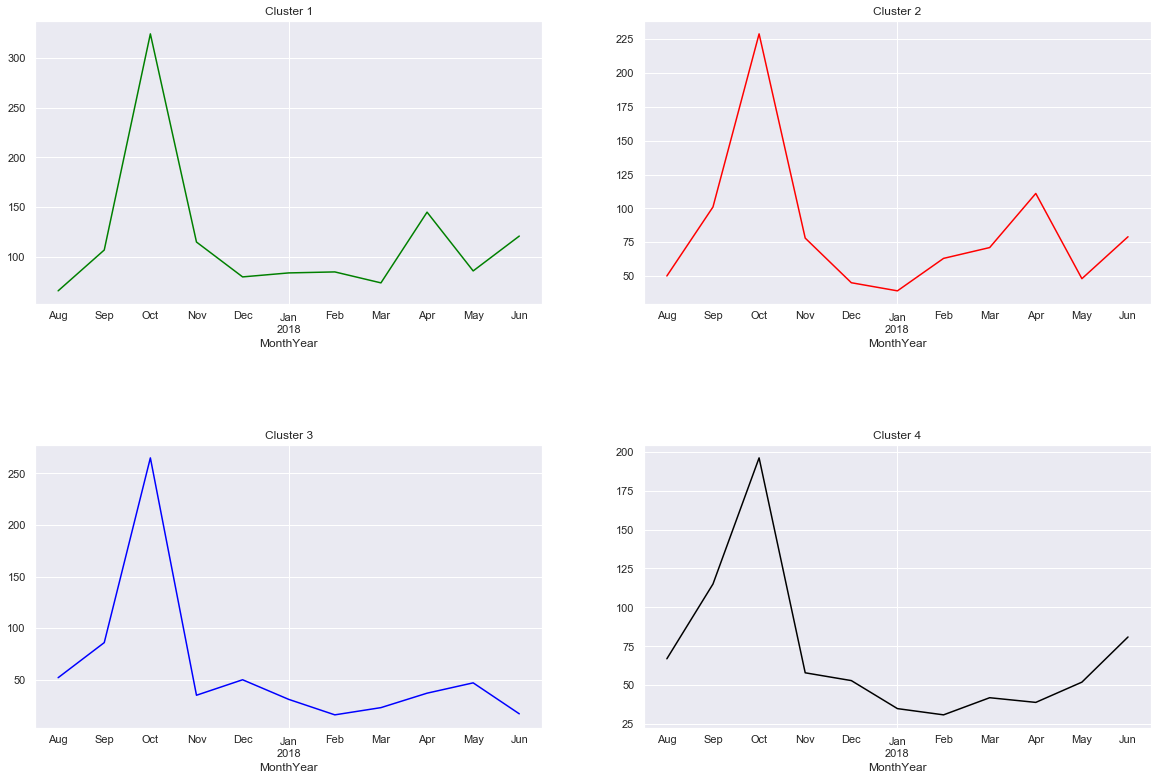

In [682]:
plt.figure(figsize=(20,13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.subplot(221)
c1_00DU16final.plot(c='green', title='Cluster 1')
plt.subplot(222)
c2_00DU16final.plot(c='red', title='Cluster 2')
plt.subplot(223)
c3_00DU16final.plot(c='blue', title='Cluster 3')
plt.subplot(224)
c4_00DU16final.plot(c='black', title='Cluster 4')

### It's pretty clear that they are almost similar in nature and one finalized technique for forecasting of either of these, should be good enough for others as well. But we can perform all the models in all of these.

### It can be hypothesized that given that these data values are for 10 month period only, a naive method based approach should be used for forecasting here. But, we will see about it later on

### Now, let's see the same output for SKU- DH19

In [666]:
c1_00DH19['MonthYear']=c1_00DH19.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c1_00DH19final=c1_00DH19.groupby(by='MonthYear').sum().Retail_Qty
c1_00DH19final.index=pd.to_datetime(c1_00DH19final.index,format='%Y-%m')

In [665]:
c2_00DH19['MonthYear']=c2_00DH19.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c2_00DH19final=c2_00DH19.groupby(by='MonthYear').sum().Retail_Qty
c2_00DH19final.index=pd.to_datetime(c2_00DH19final.index,format='%Y-%m')

In [664]:
c3_00DH19['MonthYear']=c3_00DH19.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c3_00DH19final=c3_00DH19.groupby(by='MonthYear').sum().Retail_Qty
c3_00DH19final.index=pd.to_datetime(c3_00DH19final.index,format='%Y-%m')

In [663]:
c4_00DH19['MonthYear']=c4_00DH19.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
c4_00DH19final=c4_00DH19.groupby(by='MonthYear').sum().Retail_Qty
c4_00DH19final.index=pd.to_datetime(c4_00DH19final.index,format='%Y-%m')

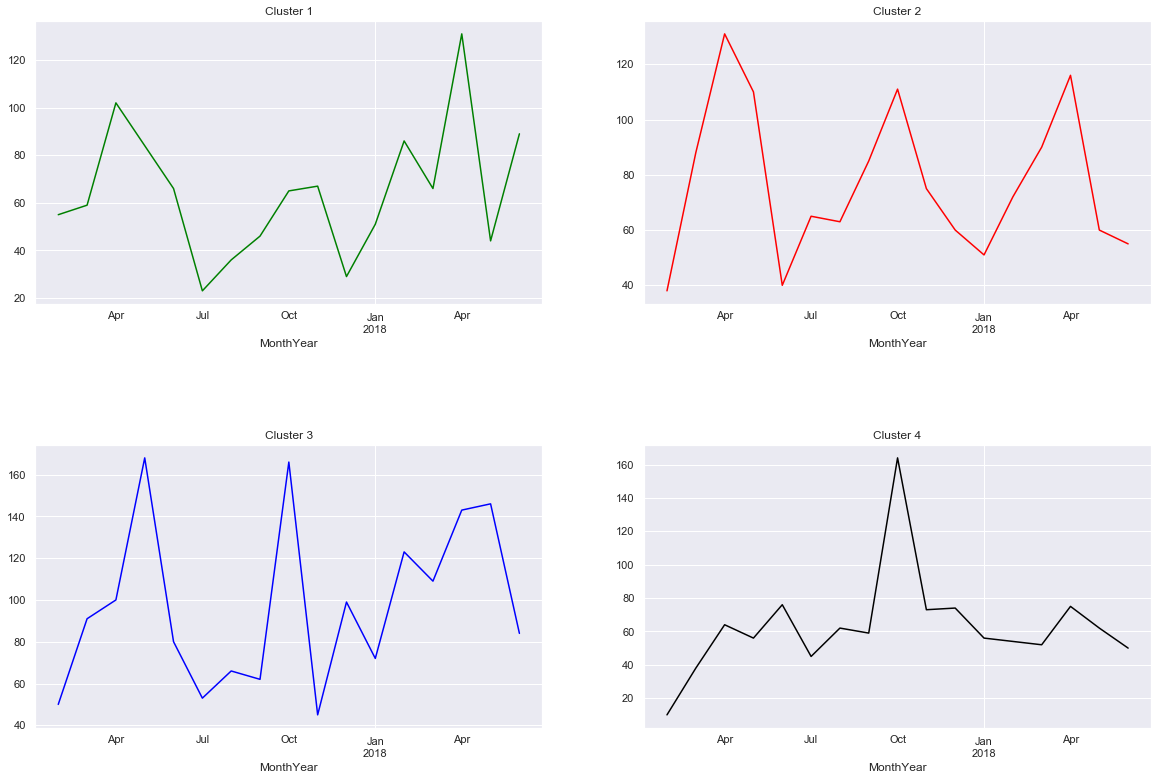

In [683]:
plt.figure(figsize=(20,13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.subplot(221)
c1_00DH19final.plot(c='green', title='Cluster 1')
plt.subplot(222)
c2_00DH19final.plot(c='red', title='Cluster 2')
plt.subplot(223)
c3_00DH19final.plot(c='blue', title='Cluster 3')
plt.subplot(224)
c4_00DH19final.plot(c='black', title='Cluster 4')

### These four TimeSeries are distinctly different from each other and moreover we have data for more than a year this time. So we might have to find the best forecasting technique for each of these separately.

### So let's start with the SKU- DU16 first.

### Since the data is available for only 11 months, we are going to take first 9 months data as Training set and we will test this on the next two months

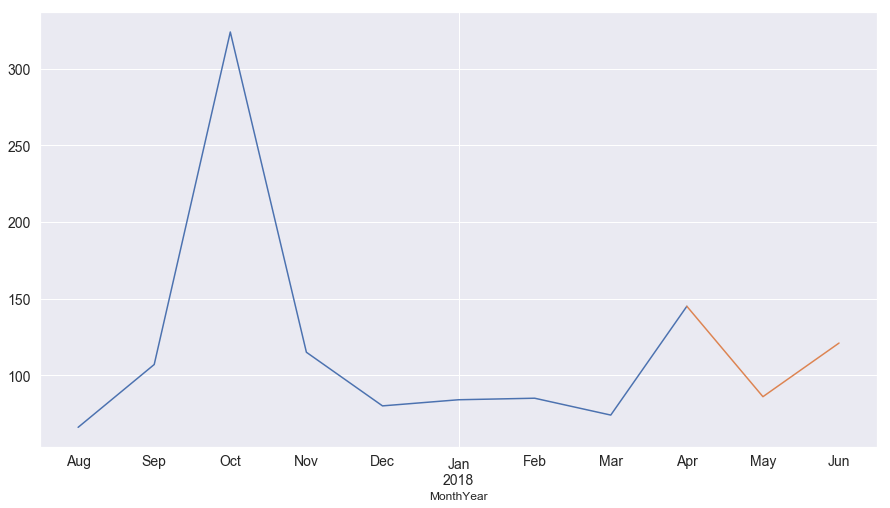

In [698]:
#Plotting data
c1_00DU16final[:-2].plot(figsize=(15,8), fontsize=14)
c1_00DU16final[-3:].plot(figsize=(15,8), fontsize=14)
plt.show()

### Point to note: The above plot includes three values in second plot, so that there's no gap in the plot shown, but for testing we are going to keep 2 month values only in our test data

### For Cluster 1, SKU- 00DU16

In [936]:
trainc1=c1_00DU16final[:-2]
testc1=c1_00DU16final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [937]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [938]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

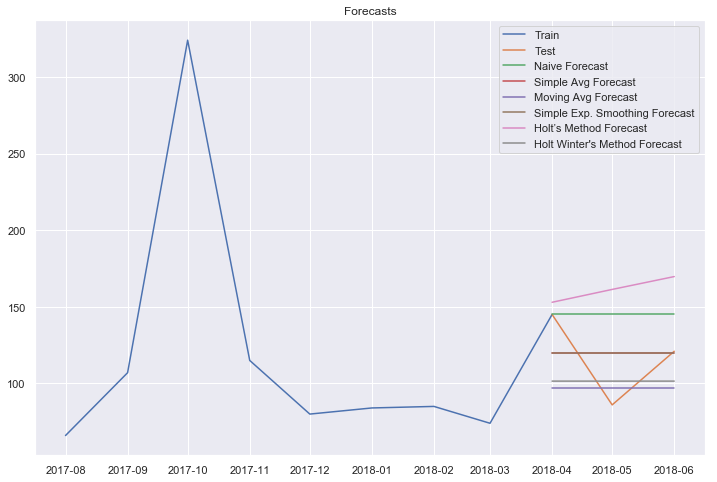

In [939]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(12,8))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [940]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [941]:
rmsnaive = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c1_00DU16final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   45.03887209955418
RMSE for Simple Avg Forecast is:                24.052026941611388
RMSE for Moving Avg Forecast is:                18.66815470259447
RMSE for SES  Forecast is:                      24.052034536086072
RMSE for Holt's Method  Forecast is:            63.45298217248685
RMSE for Holt Winter's Method  Forecast is:     17.612282600700937


### So we see, that a damped 'additive' trend in Holt Winter's is giving the lowest RMSE for our test data and that is what we are going to use for forecasting in this case. And here it is:

In [942]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [943]:
finalfit = ExponentialSmoothing(np.asarray(c1_00DU16final) ,seasonal_periods=None ,trend='add', seasonal=None,damped = True).fit()
finalout=pd.Series(finalfit.forecast(2),index=new)

### So the final forecasting result for 2 months is:

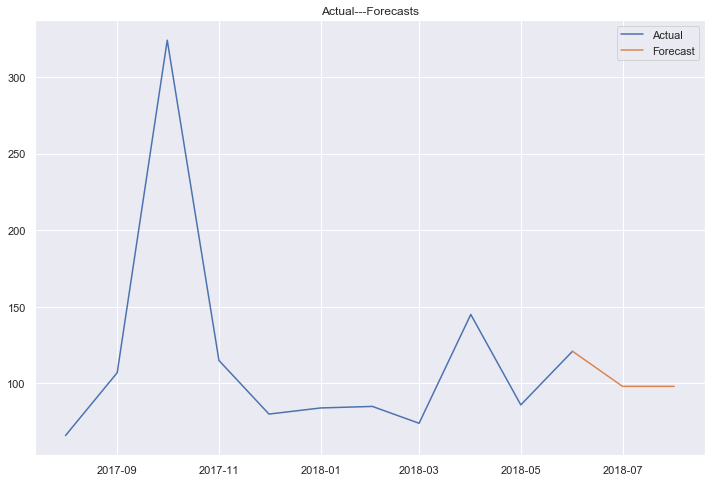

In [944]:
plt.figure(figsize=(12,8))

plt.plot(c1_00DU16final, label='Actual')
plt.plot(c1_00DU16final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

## Point to note: To give a attached pattern, I am adding last value of actual series in the forecasted.

### And similarly we will do for all others

### For Cluster 2, SKU- 00DU16

In [945]:
trainc1=c2_00DU16final[:-2]
testc1=c2_00DU16final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [946]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

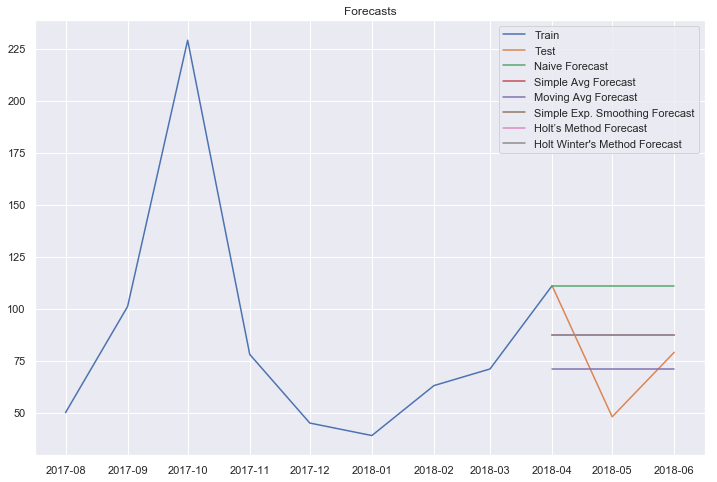

In [947]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None,damped = False).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(12,8))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [948]:
rmsnaive = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c2_00DU16final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   49.96498774141749
RMSE for Simple Avg Forecast is:                28.523436324417265
RMSE for Moving Avg Forecast is:                17.219175357722563
RMSE for SES  Forecast is:                      28.52344811639361
RMSE for Holt's Method  Forecast is:            28.524287726717056
RMSE for Holt Winter's Method  Forecast is:     28.524287726717056


### So we see, that Moving Average is giving the lowest RMSE for our test data and that is what we are going to use for forecasting in this case. 

In [890]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [950]:
finalfit = c2_00DU16final.rolling(4).mean().iloc[-1]
finalout=pd.Series(finalfit,index=new)

### So the final forecasting result for 2 months is:

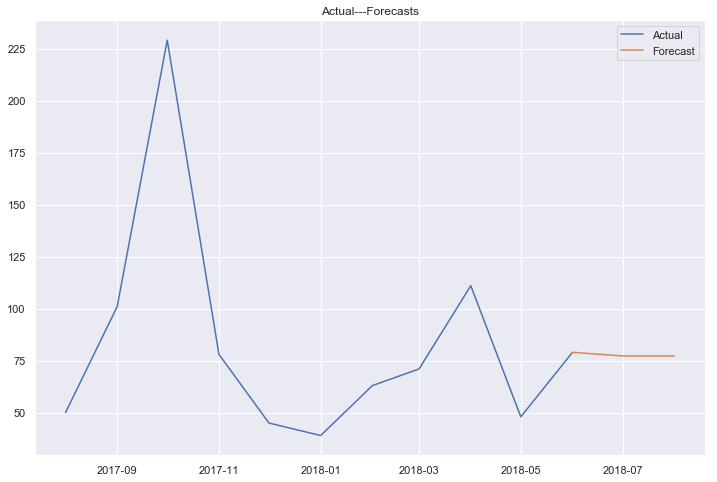

In [951]:
plt.figure(figsize=(12,8))

plt.plot(c2_00DU16final, label='Actual')
plt.plot(c2_00DU16final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### For Cluster 3, SKU- 00DU16

In [952]:
trainc1=c3_00DU16final[:-2]
testc1=c3_00DU16final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [953]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

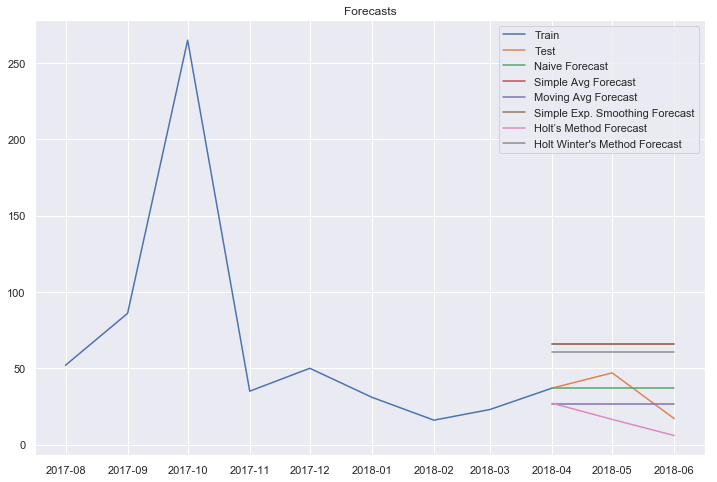

In [954]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(12,8))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [955]:
rmsnaive = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c3_00DU16final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   15.811388300841896
RMSE for Simple Avg Forecast is:                37.26349287485767
RMSE for Moving Avg Forecast is:                15.892215075312818
RMSE for SES  Forecast is:                      37.263507677162856
RMSE for Holt's Method  Forecast is:            22.935697271976807
RMSE for Holt Winter's Method  Forecast is:     32.349710266339606


### We see, that Moving Average is giving the lowest RMSE for our test data and that is what we are going to use for forecasting in this case. 

In [956]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [957]:
finalfit = c3_00DU16final.rolling(4).mean().iloc[-1]
finalout=pd.Series(finalfit,index=new)

### So the final forecasting result for 2 months is:

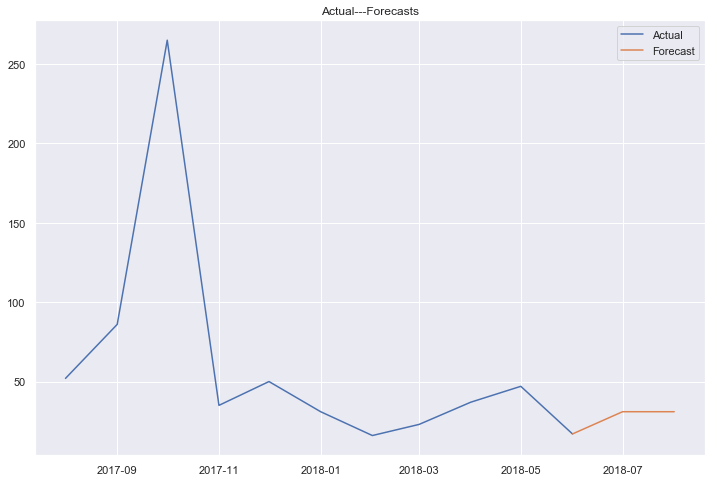

In [958]:
plt.figure(figsize=(12,8))

plt.plot(c3_00DU16final, label='Actual')
plt.plot(c3_00DU16final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### For Cluster 4, SKU- 00DU16

In [959]:
trainc1=c4_00DU16final[:-2]
testc1=c4_00DU16final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [960]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

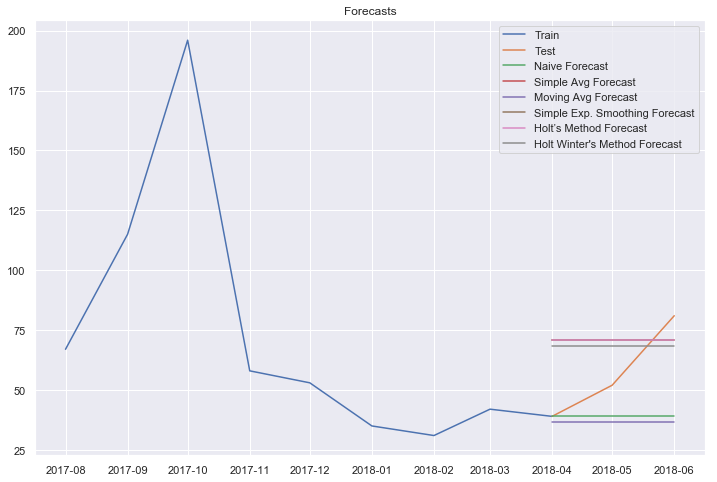

In [965]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(12,8))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [966]:
rmsnaive = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c4_00DU16final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   31.088583113419627
RMSE for Simple Avg Forecast is:                15.086785976844476
RMSE for Moving Avg Forecast is:                33.09550573718432
RMSE for SES  Forecast is:                      15.086787633000137
RMSE for Holt's Method  Forecast is:            15.087010456908928
RMSE for Holt Winter's Method  Forecast is:     14.614380609349107


### So we see, that an (damped) 'additive' trend in Holt Winter's is giving the lowest RMSE for our test data and that is what we are going to use for forecasting in this case. 

### Another point to remember here is that Holt Winter without seasonality is same as Holt's method. So that's why they both are giving same results. In above results as well, if we had given damped=True in case of Holt as well, the result might would had been same as Holt Winter's.

### Here's the final output

In [967]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [968]:
finalfit = ExponentialSmoothing(np.asarray(c4_00DU16final), seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
finalout = pd.Series(finalfit.forecast(2),index=new)

### So the final forecasting result for 2 months is:

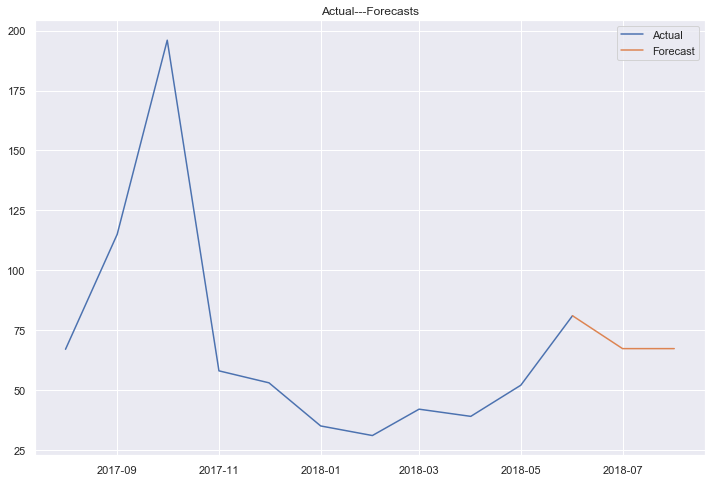

In [969]:
plt.figure(figsize=(12,8))

plt.plot(c4_00DU16final, label='Actual')
plt.plot(c4_00DU16final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### Now we will perform same operations for the other SKU- DH19

### For Cluster 1, SKU- 00DH19

In [970]:
trainc1=c1_00DH19final[:-2]
testc1=c1_00DH19final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [971]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

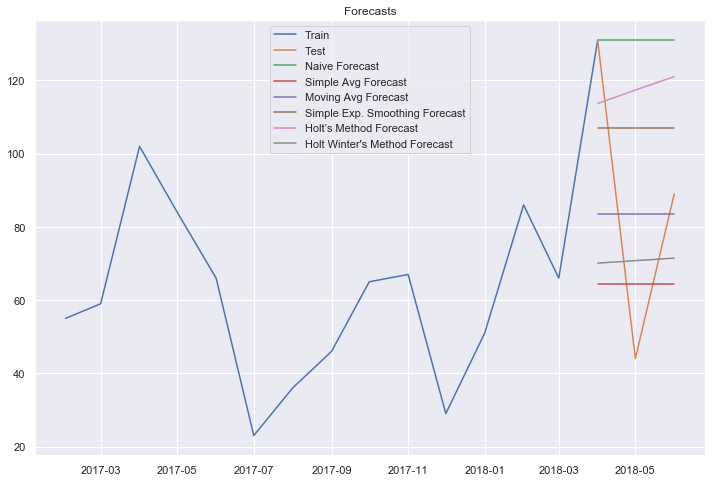

In [976]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(12,8))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [977]:
rmsnaive = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c1_00DH19final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   68.3117852204142
RMSE for Simple Avg Forecast is:                22.59778750231978
RMSE for Moving Avg Forecast is:                28.20017730440715
RMSE for SES  Forecast is:                      46.265734985133214
RMSE for Holt's Method  Forecast is:            56.615081869325124
RMSE for Holt Winter's Method  Forecast is:     22.635829900909528


### So we see, that a simple avg is the best result and (damped) 'additive' trend in Holt Winter's is giving almost same RMSE for our test data. Now, since Holt Winter's is able to capture more complex structure, so that's what we are going to use for forecasting in this case. 

### Here's the final output

In [978]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [979]:
finalfit = ExponentialSmoothing(np.asarray(c1_00DH19final), seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
finalout = pd.Series(finalfit.forecast(2),index=new)

### So the final forecasting result for 2 months is:

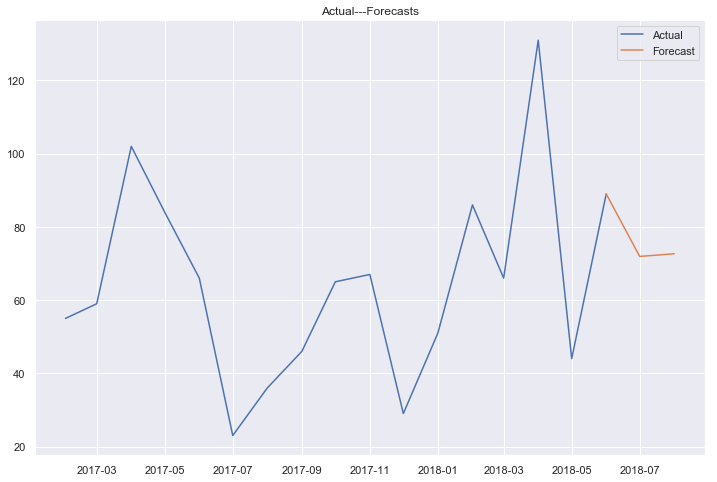

In [980]:
plt.figure(figsize=(12,8))

plt.plot(c1_00DH19final, label='Actual')
plt.plot(c1_00DH19final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### For Cluster 2, SKU- 00DH19

In [981]:
trainc1=c2_00DH19final[:-2]
testc1=c2_00DH19final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [982]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

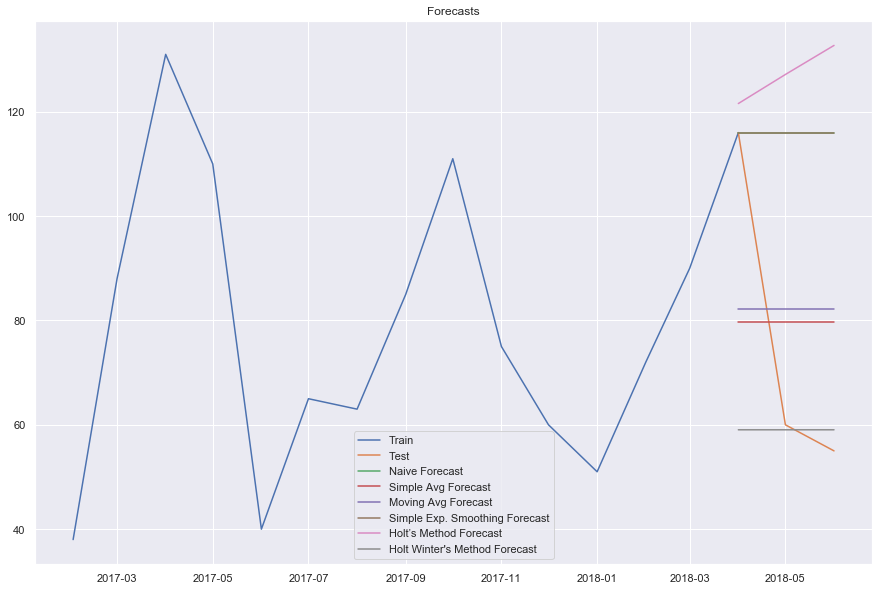

In [988]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(15,10))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [989]:
rmsnaive = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c2_00DH19final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   58.553394436189606
RMSE for Simple Avg Forecast is:                22.307198638805172
RMSE for Moving Avg Forecast is:                24.875942193211497
RMSE for SES  Forecast is:                      58.553394436189606
RMSE for Holt's Method  Forecast is:            72.6212284554479
RMSE for Holt Winter's Method  Forecast is:     2.9390024715450744


### In this case (damped) 'additive' trend in Holt Winter's is giving the lowest RMSE for our test data.

### Here's the final output

In [990]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [991]:
finalfit = ExponentialSmoothing(np.asarray(c2_00DH19final), seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
finalout = pd.Series(finalfit.forecast(2),index=new)

### So the final forecasting result for 2 months is:

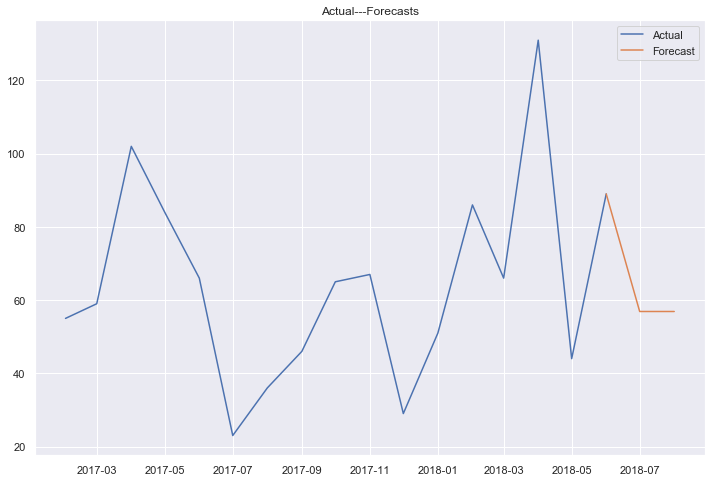

In [992]:
plt.figure(figsize=(12,8))

plt.plot(c1_00DH19final, label='Actual')
plt.plot(c1_00DH19final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### For Cluster 3, SKU- 00DH19

In [993]:
trainc1=c3_00DH19final[:-2]
testc1=c3_00DH19final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [994]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

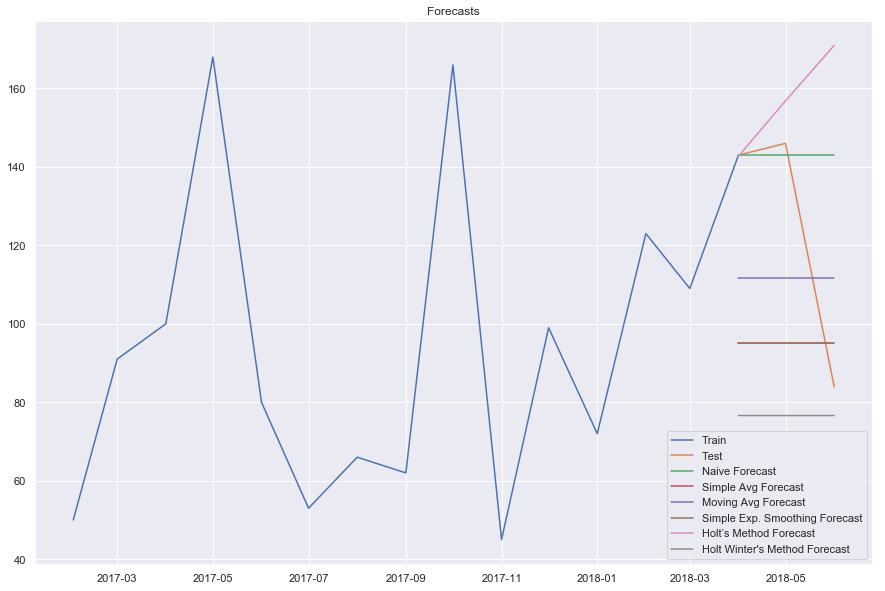

In [999]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(15,10))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [1000]:
rmsnaive = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c3_00DH19final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   41.773197148410844
RMSE for Simple Avg Forecast is:                36.8196203734428
RMSE for Moving Avg Forecast is:                31.16989733701412
RMSE for SES  Forecast is:                      36.81962273534663
RMSE for Holt's Method  Forecast is:            61.97631477238488
RMSE for Holt Winter's Method  Forecast is:     49.33187979047905


### We see, that Moving Average is giving the lowest RMSE for our test data and that is what we are going to use for forecasting in this case. 

In [1001]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [1002]:
finalfit = c3_00DH19final.rolling(4).mean().iloc[-1]
finalout=pd.Series(finalfit,index=new)

### So the final forecasting result for 2 months is:

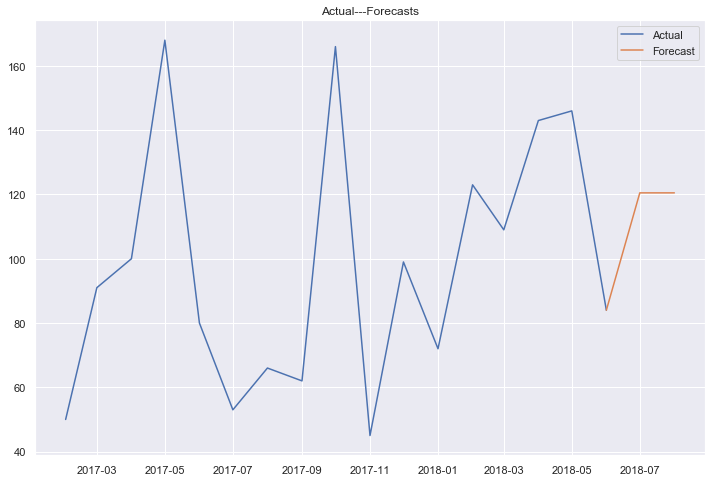

In [1003]:
plt.figure(figsize=(12,8))

plt.plot(c3_00DH19final, label='Actual')
plt.plot(c3_00DH19final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

### For Cluster 4, SKU- 00DH19

In [1004]:
trainc1=c4_00DH19final[:-2]
testc1=c4_00DH19final[-3:]

### Naive, Mean, Seasonal Naive, Moving Average, Holt and Holt Winter's method

In [1005]:
dftrain=pd.DataFrame(trainc1)
dftest= pd.DataFrame(testc1)
c1yhat = dftest.copy()

## Point to Note:

### We are not using seasonal=True, because it will give an error, as there isn't enough data to fit seasonality to our data. At least data of 2 periods has to be there to fit a seasonal model

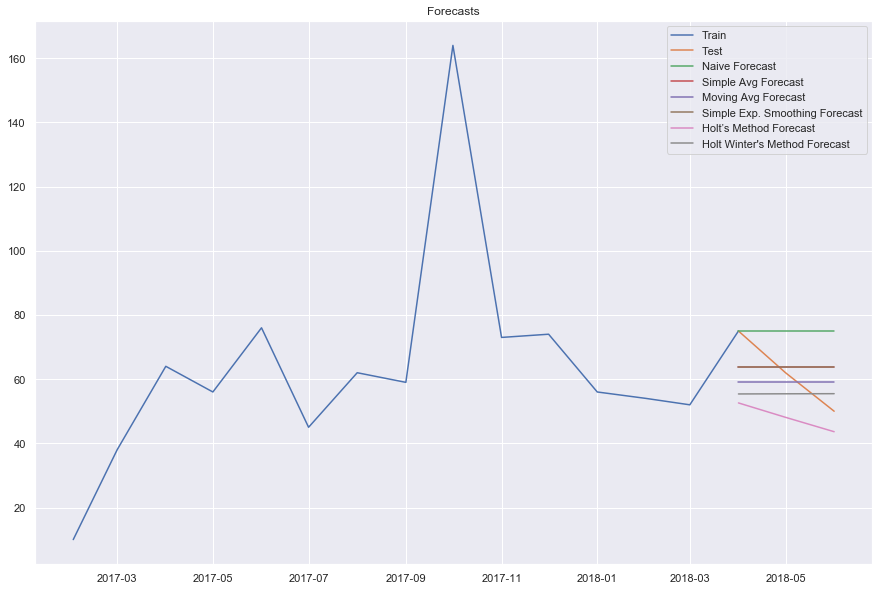

In [1010]:
# Naive Method
c1yhat['Naive_Forecast']= dftrain.iloc[-1][0]

# Simple Avg. Method
c1yhat['SAvg_Forecast'] = trainc1.mean()

# Moving Avg. Method
c1yhat['MAvg_Forecast'] = trainc1.rolling(4).mean().iloc[-1]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(np.asarray(trainc1)).fit(optimized=True)
c1yhat['SES'] = fit1.forecast(len(testc1))

# Holt's Method(Trend added)
fit2 = Holt(np.asarray(trainc1)).fit(optimized=True)
c1yhat['Holt_linear'] = fit2.forecast(len(testc1))

# Holt Winter's Method(Trend and Seasonality added)
fit3 = ExponentialSmoothing(np.asarray(trainc1) ,seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
c1yhat['HW'] = fit3.forecast(len(testc1))


plt.figure(figsize=(15,10))
plt.plot(trainc1, label='Train')
plt.plot(testc1, label='Test')

plt.plot(c1yhat.Naive_Forecast, label = 'Naive Forecast')
plt.plot(c1yhat.SAvg_Forecast, label = 'Simple Avg Forecast')
plt.plot(c1yhat.MAvg_Forecast, label = 'Moving Avg Forecast')
plt.plot(c1yhat.SES, label='Simple Exp. Smoothing Forecast')
plt.plot(c1yhat.Holt_linear, label='Holt’s Method Forecast')
plt.plot(c1yhat.HW, label="Holt Winter's Method Forecast")


plt.legend(loc='best')
plt.title("Forecasts")
plt.show()

### Now we see how each of these techniques fared as per RMSE, whichsoever is the lowest, is the best to choose

In [1011]:
rmsnaive = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.Naive_Forecast[-2:]))
print('RMSE for Naive Forecast is: a                  ',rmsnaive)

rmssavg = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.SAvg_Forecast[-2:]))
print('RMSE for Simple Avg Forecast is:               ',rmssavg)

rmsmavg = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.MAvg_Forecast[-2:]))
print('RMSE for Moving Avg Forecast is:               ',rmsmavg)

rmsses = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.SES[-2:]))
print('RMSE for SES  Forecast is:                     ',rmsses)

rmsholt = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.Holt_linear[-2:]))
print("RMSE for Holt's Method  Forecast is:           ",rmsholt)

rmshw = sqrt(mean_squared_error(c4_00DH19final[-2:], c1yhat.HW[-2:]))
print("RMSE for Holt Winter's Method  Forecast is:    ",rmshw)

RMSE for Naive Forecast is: a                   19.924858845171276
RMSE for Simple Avg Forecast is:                9.89365677818088
RMSE for Moving Avg Forecast is:                6.823672031978091
RMSE for SES  Forecast is:                      9.89365387215928
RMSE for Holt's Method  Forecast is:            10.814014931119775
RMSE for Holt Winter's Method  Forecast is:     6.0420152200602235


### In this case (damped) 'additive' trend in Holt Winter's is giving the lowest RMSE for our test data.

### Here's the final output

In [1012]:
# Creating index for forecasted values
dateRange = pd.date_range('20180701', periods = 2, freq='M')
new= dateRange.strftime('%Y-%m')
new= pd.to_datetime(new)

In [1013]:
finalfit = ExponentialSmoothing(np.asarray(c4_00DH19final), seasonal_periods=None ,trend='add', seasonal=None, damped = True).fit()
finalout = pd.Series(finalfit.forecast(2),index=new)

### So the final forecasting result for 2 months is:

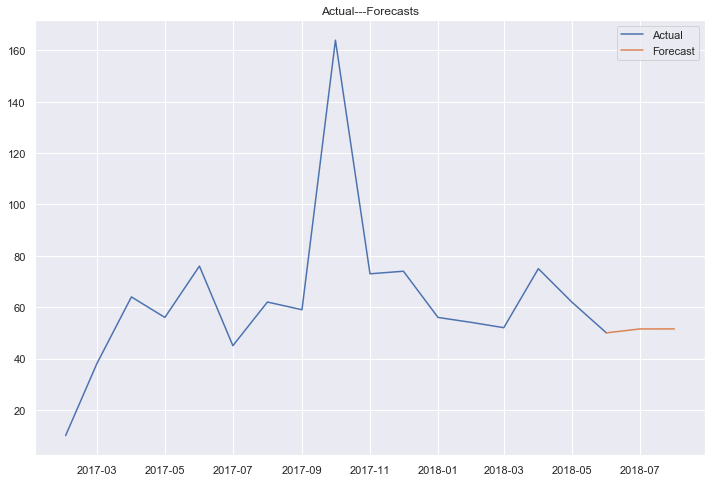

In [1014]:
plt.figure(figsize=(12,8))

plt.plot(c4_00DH19final, label='Actual')
plt.plot(c4_00DH19final.iloc[-1:].append(finalout), label='Forecast')
plt.legend(loc='best')
plt.title("Actual---Forecasts")
plt.show()

## And that's the last SKU's forecast for representative of last cluster.

### End of the case study